In [251]:
import numpy as np
import matplotlib.pyplot as plt

In [252]:
data = np.loadtxt("./houses.txt", delimiter=",")

x_features = ['size(sqft)','bedrooms','floors','age']
x_train = data[:,0:4]

y_train = data[:,4]

In [253]:
x_train = np.delete(x_train, (0), axis=0) # this is a mistake in the course code
y_train = np.delete(y_train, (0), axis=0) # adjusting to match course answers

Review the data (no scaling)

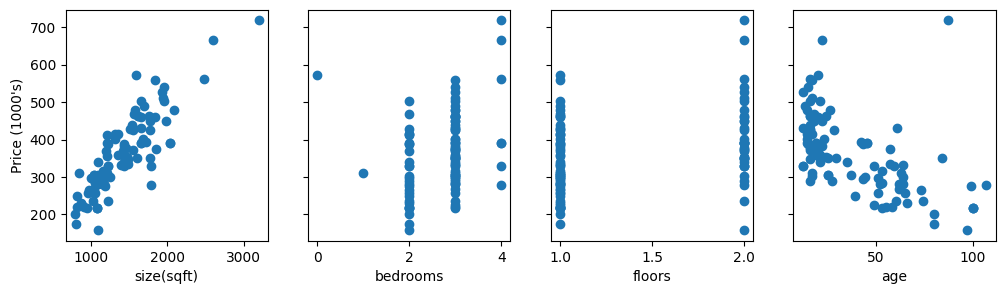

In [254]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x=x_train[:,i],y=y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")

plt.show()

# Calculate Loss

In [255]:
def ComputeLoss(x,y,w,b):

    m = x.shape[0] #rows
    
    error = np.dot(x,w) + b - y
    error2 = np.sum(error**2) / 2 / m

    return error2

# Compute Gradient

In [256]:
def CalculateGradient(x,y,w,b):

    m = x.shape[0] #rows

    error = np.dot(x,w) + b - y

    dJ_dw = np.dot(error,x) / m
    dJ_db = np.sum(error) / m 

    return dJ_dw, dJ_db

# Gradient Descent

In [257]:
def GradientDescend(x,y,w,b,alpha=0.01,iterations=100):

    i=0
    log = []

    w_new = np.copy(w)
    b_new = b

    while i < iterations:

        dJ_dw, dJ_db = CalculateGradient(x,y,w_new,b_new)

        w_new = w_new - alpha * dJ_dw
        b_new = b_new - alpha * dJ_db

        log.append([i,w_new,b_new,dJ_dw, dJ_db, ComputeLoss(x,y,w_new,b_new)])

        i += 1

    log = np.array(log, dtype=object)

    return w_new, b_new, log


# Gradient Descent without scaling

In [258]:
w_init = np.zeros_like(x_train[0])
b_init = 0

* $\alpha$ = 9.9e-7

In [259]:
w_final, b_final, log = GradientDescend(x_train,y_train,w_init,b_init, alpha=9.9e-7, iterations=100)
print("diverging gradients dJ_dw, dJ_db see + change to - \n")
print(log[:,1][:5]) #vector w

diverging gradients dJ_dw, dJ_db see + change to - 

[array([5.46265788e-01, 9.95942280e-04, 5.13326620e-04, 1.22787176e-02])
 array([-0.08770797, -0.00017404, -0.00010024, -0.00340943])
 array([6.48129707e-01, 1.16980959e-03, 5.94094085e-04, 1.33626697e-02])
 array([-0.20586534, -0.00040393, -0.00022954, -0.00753799])
 array([7.85333727e-01, 1.40855459e-03, 7.08607848e-04, 1.52864608e-02])]


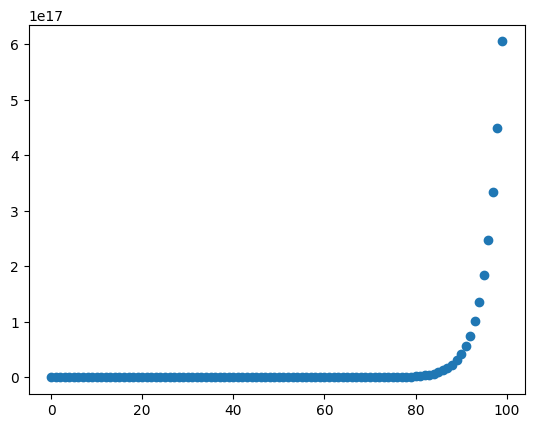

In [260]:
plt.scatter(log[:,0],log[:,5])

* $\alpha$ = 9e-7

In [261]:
w_final, b_final, log = GradientDescend(x_train,y_train,w_init,b_init, alpha=9e-7, iterations=100)
print("diverging gradients jumping on the same heights \n")
print(log[:,1][:5]) #vector w
print(log[:,5][:5]) #cost

diverging gradients jumping on the same heights 

[array([4.96605262e-01, 9.05402073e-04, 4.66660564e-04, 1.11624705e-02])
 array([ 1.78059389e-02,  2.07846239e-05,  2.00655726e-06, -7.88170014e-04])
 array([4.79493079e-01, 8.62115811e-04, 4.35328826e-04, 9.54786063e-03])
 array([ 3.43618123e-02,  3.92941315e-05,  2.82253495e-06, -1.60397292e-03])
 array([4.63586120e-01, 8.21060265e-04, 4.05150812e-04, 7.96379775e-03])]
[66461.58355438437 61898.99983327461 57657.20912020184 53713.65470200472
 50047.36595469984]


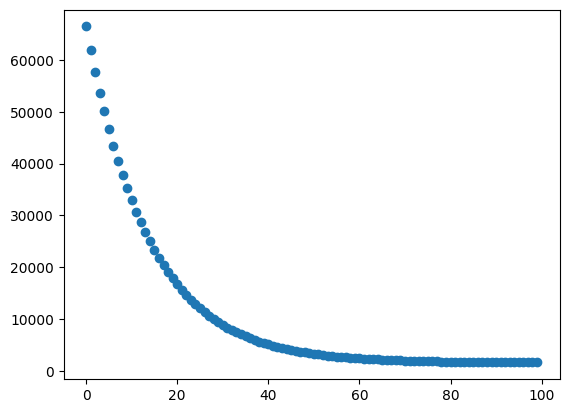

In [262]:
plt.scatter(log[:,0],log[:,5])

* $\alpha$ = 1e-7

In [263]:
w_final, b_final, log = GradientDescend(x_train,y_train,w_init,b_init, alpha=1e-7, iterations=100)
print("convergin gradients \n")
print(log[:,1][:5]) #vector w
print(log[:,5][:5]) #cost

convergin gradients 

[array([5.51783624e-02, 1.00600230e-04, 5.18511737e-05, 1.24027450e-03])
 array([9.83146929e-02, 1.79101454e-04, 9.22046367e-05, 2.19520196e-03])
 array([1.32037100e-01, 2.40326673e-04, 1.23569704e-04, 2.92705915e-03])
 array([1.58400121e-01, 2.88046295e-04, 1.47908047e-04, 3.48453131e-03])
 array([1.79009904e-01, 3.25207856e-04, 1.66753212e-04, 3.90567836e-03])]
[44231.26525678279 27646.115402741387 17510.22444209241 11315.74324982964
 7530.021145575079]


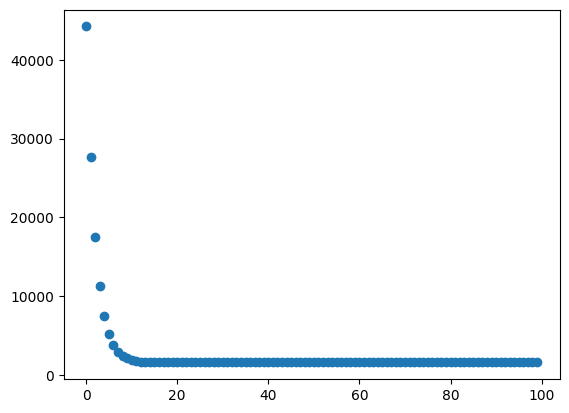

In [264]:
plt.scatter(log[:,0],log[:,5])

# Feature Scaling

In [265]:
def scale_features(x):

    m = x.shape[1] #features

    mean = []
    stdev = []

    x_scaled = np.zeros_like(x)

    i=0

    for i in range(m):

        mean_i = np.mean(x[:,i])
        stdev_i = np.std(x[:,i])

        x_scaled[:,i] = (x[:,i] - mean_i) / stdev_i

        mean.append(mean_i)
        stdev.append(stdev_i)

        i += 1

    
    return x_scaled, mean, stdev

In [266]:
x_scaled, mean, stdev = scale_features(x_train)

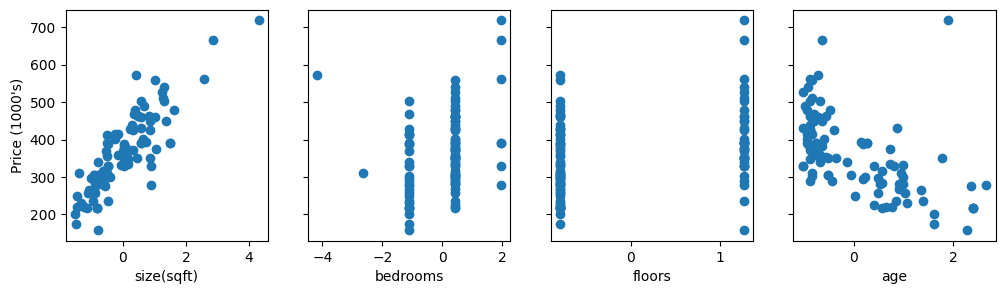

In [267]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x=x_scaled[:,i],y=y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")

plt.show()

# Gradient Descent with scaling

See learning rate is now 0.1 instead of ^-7 or ^-8

In [268]:
w_norm, b_norm, log_norm = GradientDescend(x_scaled,y_train, w_init, b_init, alpha=0.1, iterations=1000)
w_norm, b_norm

(array([110.56039756, -21.26715096, -32.70718139, -37.97015909]),
 363.15608080808056)

Convergence is faster

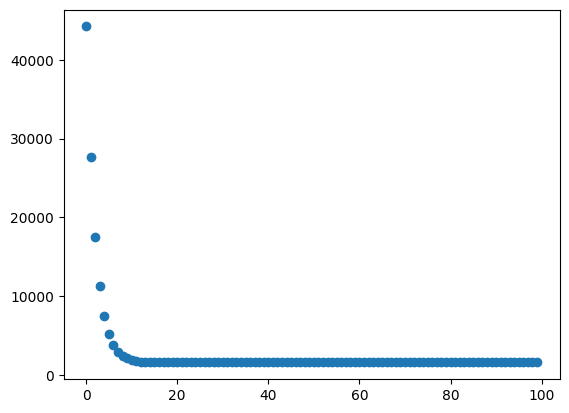

In [269]:
plt.scatter(log[:,0],log[:,5])

# Prediction

Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.

In [270]:
given = np.array([1200,3,1,40])

given_norm = (given - mean) / stdev

prediction = np.dot (given_norm, w_norm) + b_norm

print(f"Predicted price os 1200sqft appartment with 3 bedrooms and 1 floor and 40 yo = {prediction} k")

Predicted price os 1200sqf appartment with 3 bedrooms and 1 floor and 40 yo = 318.70909231999923 k
